In [2]:
# Setup for the module
import csv
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import date, datetime
fn = 'Apt106_2015.csv'

<IPython.core.display.Javascript object>


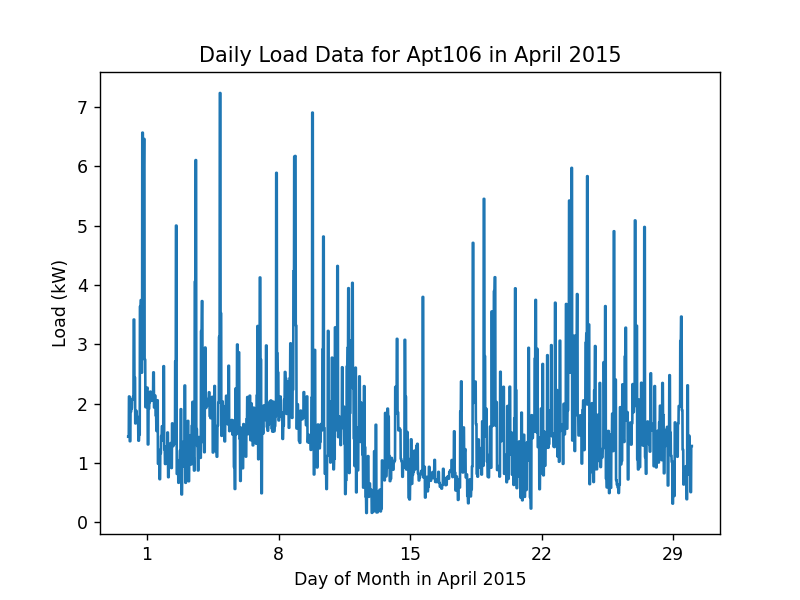

In [3]:
%matplotlib notebook
# Prints the load for each day of the month for building Apt 100 based on the average every hour,
# data trends eclipsed as a whole for each individual day

# opens the csv file
with open(fn, newline = '') as csvfile:
            reader = csv.reader(csvfile, 'excel')
            ti, usage = zip(*reader)
            t = [None]*(len(ti)//4)
            u = np.zeros(len(usage)//4)
            
            # averaging mechanism for the points for each hour
            for i in range(0, len(usage), 4):
                if(i >= len(u)):
                    break  
                if (i == len(u) - 3):
                    u[i:i+3] = 3*[np.average([float(x) for x in usage[i:i+4]])]
                    break
                u[i:i+4] = 4*[np.average([float(x) for x in usage[i:i+4]])]
            
            # getting the associated axis labels for days of the month                      
            for i in range(0, len(ti), 4):
                if(i >= len(t)):
                    break
                t[i:i+4] = 4*[datetime.fromisoformat(ti[i]).isoformat()]
            ap1 = t.index("2015-04-01T00:00:00")
            u = u[ap1:ap1+24*4*30]
            # plot settings, spacing the days out on the x axis
            t = (1/96) * np.array(range(0, len(u)))
            plt.plot(t, u)
            plt.xticks(np.arange(1,30,7))
            plt.title("Daily Load Data for {} in April 2015".format(fn[:-9]))
            plt.xlabel("Day of Month in April 2015")
            plt.ylabel("Load (kW)")
            plt.show()

What day of April's data do you want to see? 1


<IPython.core.display.Javascript object>


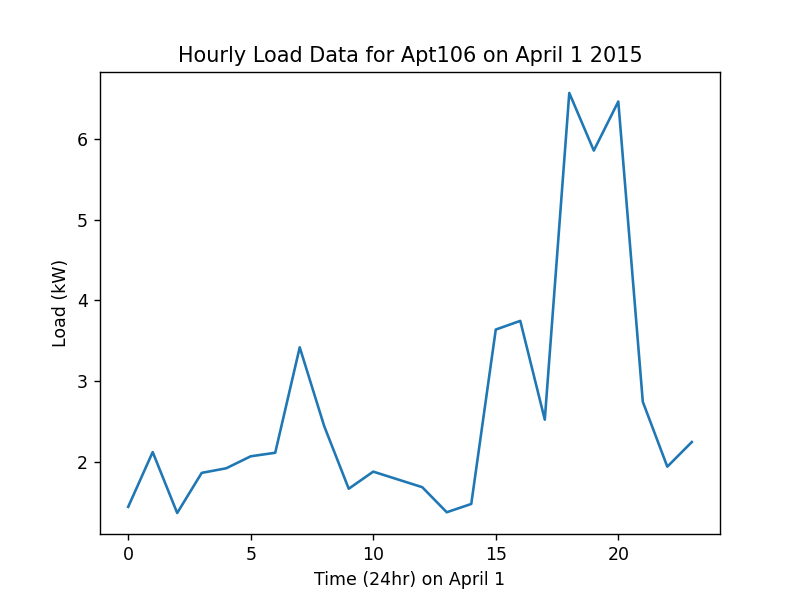

In [34]:
# Prints the load for each day of the month for building Apt 100 based on the average every hour,
# data trends eclipsed as a whole for each individual day
%matplotlib notebook
# opens the csv file
with open(fn, newline = '') as csvfile:
            reader = csv.reader(csvfile, 'excel')
            ti, usage = zip(*reader)
            t = [None]*(len(ti)//4)
            u = np.zeros(len(usage)//4)
            
            # averaging mechanism for the points for each hour
            for i in range(0, len(usage), 4):
                if(i >= len(u)):
                    break  
                if (i == len(u) - 3):
                    u[i:i+3] = 3*[np.average([float(x) for x in usage[i:i+4]])]
                    break
                u[i:i+4] = 4*[np.average([float(x) for x in usage[i:i+4]])]
            
            # getting the associated axis labels for days of the month                      
            for i in range(0, len(ti), 4):
                if(i >= len(t)):
                    break
                t[i:i+4] = 4*[datetime.fromisoformat(ti[i]).isoformat()]
            a = 0
            while (a < 1 or a > 30):
                a = int(input("What day of April's data do you want to see? "))

            ap1 = t.index("2015-04-01T00:00:00")+(a-1)*24*4
            t = [int(x[11:13]) for x in t[ap1:ap1+24*4]]
            u = u[ap1:ap1+24*4]
            # plot settings, spacing the days out on the x axis
            plt.plot(t,u)
            plt.title("Hourly Load Data for {} on April {} 2015".format(fn[:-9], a))
            plt.xlabel("Time (24hr) on April {}".format(a))
            plt.ylabel("Load (kW)")
            plt.show()

What day of April's data do you want to see? 3


<IPython.core.display.Javascript object>


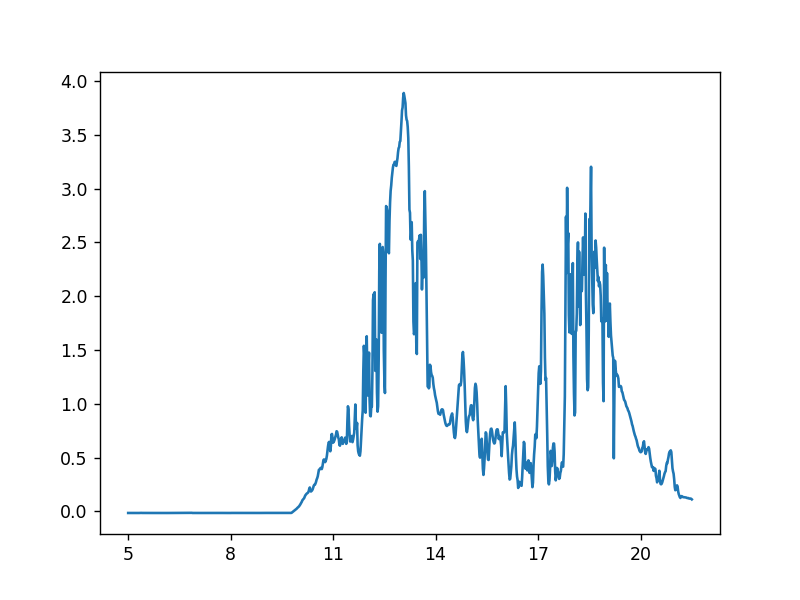

In [45]:
%matplotlib notebook

# Prints the generation for a day of the month for building Apt 106, based on the solar generation plots for a minutely basis 
i = 0
while (i < 1 or i > 30):
    i = int(input("What day of April's data do you want to see? "))
# opens the csv file
if (i < 10):
    f = "solar_2015-04-0{}.csv".format(i)
elif (i < 31):
    f = "solar_2015-04-{}.csv".format(i)
with open(f, newline = '') as csvfile:
            reader = csv.reader(csvfile, 'excel')
            ti,lo,gen = zip(*reader)
            t = [None]*(len(ti))
            u = np.zeros(len(gen))
            # getting the associated axis labels for days of the month                      
            for j in range(0, len(ti)):
                t[j] = datetime.fromisoformat(lo[j]).time().strftime("%H:%M")

            for j in range(0, len(gen)):
                u[j] = float(gen[j])
            plt.plot(t,u)
            plt.xticks(np.arange(0, len(ti), 180), np.arange(5, 21, 3))
            plt.show()
